# **Import Libraries**

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# **Retrieve Data**

In [2]:
filename = 'C:/Users/dkim207/OneDrive - Comcast/Tableau Repository/dave_final_project_sampled.txt'
df1      = pd.read_csv(filename,sep="|")
df1.rename(columns=lambda x: x.split('.')[1], inplace=True)

In [185]:
df = df1.copy()

In [3]:
# Add in digital traffic by account
filename2 = 'C:/Users/dkim207/OneDrive - Comcast/Tableau Repository/dk_final_proj_digital_accounts.csv'
digital_accts = pd.read_csv(filename2,sep="\t")

In [186]:
# Combine dataframes to add digital traffic data
cols = ['account']
df = df.join(digital_accts.set_index(cols), on=cols)

In [187]:
#Identify digital visitors and shoppers
df[['visited_digital_last_30_days', 'digital_shopper']] = df[['visited_digital_last_30_days', 'digital_shopper']].fillna(0)
df[['visited_digital_last_30_days', 'digital_shopper']] = df[['visited_digital_last_30_days', 'digital_shopper']].astype(int)
#Don't need this actually
df = df.drop(['digital_shopper'], axis=1)

# **Let's Explore the Data**

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884602 entries, 0 to 884601
Columns: 111 entries, housekey to visited_digital_last_30_days
dtypes: float64(80), int32(1), int64(11), object(19)
memory usage: 745.8+ MB


**The data-set has 884602 examples and 110 features + the target variable**. 19 are objects that will need to be converted.

In [189]:
df.describe()

,housekey,account,accountid,videopenetrationrate,total_mrc_amt,offer_months_duration,mrc_net_offer_amt,number_of_products,number_of_products_6m,equip_wireless_gateway_cnt,...,hsd_dn_gb_sum_90d,hsd_avggb_weekday_90d,hsd_avggb_weekend_90d,hsd_earlyfringe_dn_l30d,hsd_earlymorn_dn_l30d,hsd_latefringe_dn_l30d,hsd_postlatefringe_dn_l30d,hsd_primetime_dn_l30d,target_addxm,visited_digital_last_30_days
count,8.846020e+05,8.846020e+05,8.846020e+05,884602.000000,836374.000000,613800.000000,613800.000000,884602.000000,785283.000000,884262.000000,...,884602.000000,884602.000000,884602.000000,884602.000000,884602.000000,884602.000000,884602.000000,884602.000000,884602.000000,884602.000000
mean,4.689186e+13,8.537726e+15,3.226494e+08,0.481152,138.222829,17.443047,102.547773,2.135857,2.296038,0.233208,...,412.544000,6.555151,8.962172,23.833181,10.804638,4.670260,10.938682,30.603981,0.095638,0.022027
std,3.158968e+13,2.316010e+14,2.259950e+08,0.253693,68.431883,27.659924,47.871097,0.936925,0.799879,0.435742,...,455.687938,7.306473,9.707307,28.914454,15.470963,7.403285,21.098721,35.640888,0.294095,0.146771
min,1.001000e+12,8.155100e+15,1.001400e+05,0.000000,0.000000,1.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-8.730000,-8.250000,-2.980000,-9.790000,0.000000,0.000000,0.000000
25%,2.065736e+13,8.396411e+15,4.293640e+07,0.297297,80.950000,12.000000,59.990000,2.000000,2.000000,0.000000,...,81.370000,1.333764,1.734563,3.150000,1.490000,0.120000,0.550000,3.800000,0.000000,0.000000
50%,3.740517e+13,8.499100e+15,4.910349e+08,0.473684,140.440000,12.000000,100.000000,2.000000,2.000000,0.000000,...,266.455000,4.226474,5.912216,13.170000,5.350000,1.430000,2.860000,18.160000,0.000000,0.000000
75%,7.751086e+13,8.771402e+15,5.204409e+08,0.666667,190.590000,24.000000,134.980000,3.000000,3.000000,0.000000,...,591.517500,9.312540,13.016075,34.380000,13.810000,6.110000,11.260000,45.220000,0.000000,0.000000
max,9.999900e+13,8.993410e+15,5.320413e+08,1.000000,584.400000,9604.000000,309.990000,4.000000,4.000000,16.000000,...,11079.020000,283.905670,326.018985,364.300000,361.290000,109.850000,456.810000,426.900000,1.000000,1.000000


**9.5% out of the dataset has attached XM**. Some features look to potentially have outliers and missing values.

In [190]:
# Dropping some columns I don't like, keeping accounts in a separate dataframe
df_account = df.copy()
df = df.drop(['housekey','accountid','account','email_snt_yahoo_l90d','email_snt_aol_l90d','email_snt_comcast_l90d','email_snt_gmail_l90d','email_opn_anyedu_l90d','email_snt_anynet_l90d','email_snt_anyedu_l90d','email_snt_anycom_l90d','expdemo_consumer_mosaic_2011_us'], 1)
TargetVar = 'target_addxm'

In [191]:
# Balancing data to due the large skew of rows without XM
TargetVar = 'target_addxm'
Pdf_TargetOneD = df.loc[df[TargetVar] == 1].copy()
Pdf_TargetZeroD = df.loc[df[TargetVar] == 0].copy()
Target_ZeroD = Pdf_TargetZeroD.take(np.random.permutation(len(Pdf_TargetZeroD))[:len(df.loc[df[TargetVar] == 1])]).copy()

# Creating a final data frame
df = Pdf_TargetOneD.append(Target_ZeroD, ignore_index=True).copy()

1    84602
0    84602
Name: target_addxm, dtype: int64


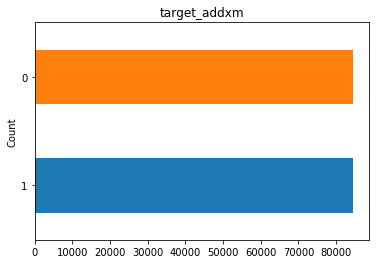

In [192]:
# Check distribution of dataframe
df[TargetVar].value_counts().plot(kind='barh')
print(df[TargetVar].value_counts())
print(" ========================")
plt.title(TargetVar)
plt.ylabel('Count')
plt.show()

In [193]:
# Look at what data is missing:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.sort_values(by='Total',ascending=False).head(50)

,Total,%
svcs_days_since_most_recent_xh,158054,93.4
svcs_xh_days_on_books,158054,93.4
svcs_days_since_last_x1_product_ended,128387,75.9
svcs_days_since_had_last_cdv,118078,69.8
wifi_total_gb,113509,67.1
svcs_days_since_last_dvr_service_ended,109366,64.6
cdv_total_min,95223,56.3
svcs_cdv_days_on_books,90618,53.6
svcs_days_since_most_recent_cdv,90618,53.6
svcs_days_since_last_hd_service_ended,87047,51.4


In [194]:
# Some columns with missing data seem to be counters, Fillna with 0 for those.
cols = ['svcs_days_since_most_recent_xh','svcs_xh_days_on_books','svcs_days_since_last_x1_product_ended','svcs_days_since_had_last_cdv','svcs_days_since_last_dvr_service_ended','svcs_cdv_days_on_books','svcs_days_since_most_recent_cdv','svcs_days_since_last_hd_service_ended','svcs_days_since_had_last_video','svcs_days_since_most_recent_x1','svcs_days_since_had_last_hsd','offer_months_duration','svcs_video_days_on_books','svcs_days_since_most_recent_video','svcs_days_since_most_recent_hsd','svcs_hsd_days_on_books']
df[cols] = df[cols].fillna(0)

In [195]:
# Convert num of children to float
df['demo_children_num_hh'][df['demo_children_num_hh']=='7+']='7'
df['demo_children_num_hh'][df['demo_children_num_hh']==0.0]='0'
df['demo_children_num_hh'][df['demo_children_num_hh']==1.0]='1'
df['demo_children_num_hh'][df['demo_children_num_hh']==2.0]='2'
df['demo_children_num_hh'][df['demo_children_num_hh']==3.0]='3'
df['demo_children_num_hh'][df['demo_children_num_hh']==4.0]='4'
df['demo_children_num_hh'][df['demo_children_num_hh']==5.0]='5'
df['demo_children_num_hh'][df['demo_children_num_hh']==6.0]='6'

In [196]:
df['svcs_hsd_tier_name'].value_counts()

BLAST HSD                  59916
PERFORMANCE TIER HSD       53670
EXTREME 105/150 HSD        11836
PERFORMANCE 25 HSD         10300
NO HSD                      9095
BLAST PRO HSD               6183
PERFORMANCE PRO HSD         5972
INTERNET ESSENTIALS HSD     4575
PERFORMANCE STARTER HSD     3852
ECONOMY PLUS HSD            1432
GIGABIT PRO HSD             1360
EXTREME 250/505 HSD          934
INTERNET 5 HSD                36
ULTRA HSD                      6
Name: svcs_hsd_tier_name, dtype: int64

In [197]:
hsd_tier = {"BLAST HSD": 0, 
            "PERFORMANCE TIER HSD": 1,
            "EXTREME 105/150 HSD": 2,
            "PERFORMANCE 25 HSD": 3,
            "NO HSD": 4,
            "BLAST PRO HSD": 5,
            "PERFORMANCE PRO HSD": 6,
            "INTERNET ESSENTIALS HSD": 7,
            "ECONOMY PLUS HSD": 8,
            "GIGABIT PRO HSD": 9,
            "EXTREME 250/505 HSD": 10,
            "INTERNET 5 HSD": 11,
            "ULTRA HSD": 12
           }
df['svcs_hsd_tier_name'] = df['svcs_hsd_tier_name'].map(hsd_tier)

In [198]:
# Picking a few features that look like could contribute to XM attach rate
feats = ['email_opn_anycom_l90d','number_of_products','total_mrc_amt','auto_pay_enrollment','demo_children_num_hh','svcs_hsd_tier_name']

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' k

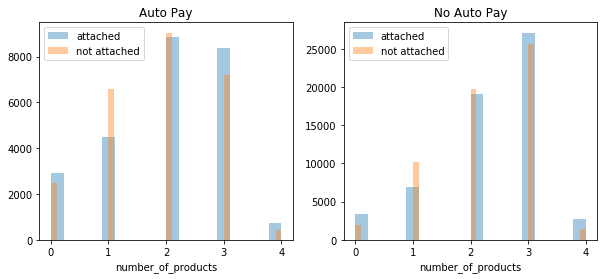

In [199]:
# Number of Products and Auto Pay
attached = 'attached'
not_attached = 'not attached'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
autopay = df[df['auto_pay_enrollment']==1]
no_autopay = df[df['auto_pay_enrollment']==0]
ax = sns.distplot(autopay[autopay[TargetVar]==1].number_of_products.dropna(), bins=18, label = attached, ax = axes[0], kde =False)
ax = sns.distplot(autopay[autopay[TargetVar]==0].number_of_products.dropna(), bins=40, label = not_attached, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Auto Pay')
ax = sns.distplot(no_autopay[no_autopay[TargetVar]==1].number_of_products.dropna(), bins=18, label = attached, ax = axes[1], kde =False)
ax = sns.distplot(no_autopay[no_autopay[TargetVar]==0].number_of_products.dropna(), bins=40, label = not_attached, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('No Auto Pay')

It seems that being on Auto Pay has no importance, which is interesting as Auto Pay is the only payment option available on XM. However **customers with Triple or Quad play have seem to have increased odds of XM attach**, this is not a surprise as this would naturally represent customers with higher brand loyalty. 

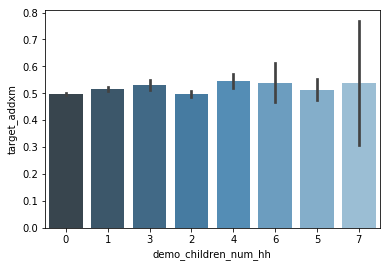

In [200]:
#Children in hh
sns.barplot(x='demo_children_num_hh', y='target_addxm', data=df, palette="Blues_d")

#A bar plot represents an estimate of central tendency for a numeric variable
#with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

It looks like number of children in hh may not contribute to an account's XM attach rate prediction.

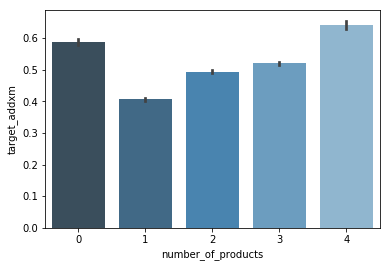

In [201]:
#Number of Products
sns.barplot(x='number_of_products', y='target_addxm', data=df, palette="Blues_d")

#A bar plot represents an estimate of central tendency for a numeric variable
#with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

**customers with Triple or Quad play have seem to have increased odds of XM attach, especially Quad play**. This is not a surprise as this would naturally represent customers with higher brand loyalty. 

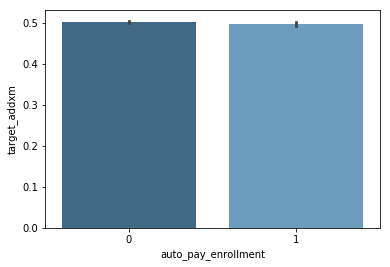

In [202]:
#Number of Products
sns.barplot(x='auto_pay_enrollment', y='target_addxm', data=df, palette="Blues_d")

#A bar plot represents an estimate of central tendency for a numeric variable
#with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

It seems that being on Auto Pay has no importance, which is interesting as Auto Pay is the only payment option available on XM.

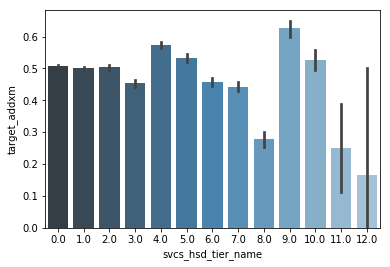

In [271]:
#Number of Products
sns.barplot(x='svcs_hsd_tier_name', y='target_addxm', data=df, palette="Blues_d")

#A bar plot represents an estimate of central tendency for a numeric variable
#with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

9 = Gigabit

4 = No HSD

5 = Blast Pro

10 = Extreme 250/505

Gigabit subscribers look like the most XM likely customers, and NO HSD subscribers also showing higher likelihood. These are 2 opposite ends of the spectrum but also make sense - Gigabit customers likely would want to consolidate their broadband with 1 company, and also would appreciate the Verizon network. On the other hand HSD is required for XM, so for anyone who is interested in XM they would have to add HSD.

## Create new feature

In [204]:
# Number of Products + Visited the website
df['num_prod_site_visited']= df['number_of_products'] + df['visited_digital_last_30_days']

# **Data Prep**

In [205]:
#Dropping columns with more than 85% of missing values
df = df.dropna(thresh=len(df)*0.15, axis=1)

In [206]:
print('Columns with Object types')
print(pd.Series(df.select_dtypes(include=[object]).columns))
print('=============')
print('Number of Missing')
print(df.select_dtypes(include=[object]).isnull().sum())

Columns with Object types
0           serloc_biller_dwelling_type_desc
1               cusacc_current_division_name
2                 cusacc_current_region_name
3                 cusacc_electronic_bill_ind
4                        offer_prod_mix_name
5                       svcs_video_tier_name
6                         svcs_cdv_tier_name
7        expdemo_consumer_dwelling_unit_size
8             expdemo_consumer_dwelling_type
9     expdemo_consumer_comb_homeowner_renter
10      expdemo_consumer_estimated_hh_income
11     expdemo_consumer_purchase_via_on_line
12      expdemo_consumer_presence_cell_phone
13            expdemo_consumer_cell_phone_ai
14                            vi_minsperacct
15                           demo_len_of_res
16                      demo_children_num_hh
dtype: object
Number of Missing
serloc_biller_dwelling_type_desc              0
cusacc_current_division_name                  0
cusacc_current_region_name                    0
cusacc_electronic_bill_ind       

In [207]:
#Fill missing data with most common
df['svcs_video_tier_name'].describe()

count                      169167
unique                          8
top       DIGITAL PREFERRED VIDEO
freq                        74137
Name: svcs_video_tier_name, dtype: object

In [208]:
common_value = 'DIGITAL PREFERRED VIDEO'
df['svcs_video_tier_name'] = df['svcs_video_tier_name'].fillna(common_value)

In [209]:
df['svcs_cdv_tier_name'].describe()

count     169167
unique         3
top       NO CDV
freq       90582
Name: svcs_cdv_tier_name, dtype: object

In [210]:
common_value = 'NO CDV'
df['svcs_cdv_tier_name'] = df['svcs_cdv_tier_name'].fillna(common_value)

In [211]:
df['expdemo_consumer_dwelling_unit_size'].describe()

count     168677
unique         9
top            A
freq      127529
Name: expdemo_consumer_dwelling_unit_size, dtype: object

In [212]:
df['expdemo_consumer_dwelling_type'].describe()

count     168677
unique         4
top            S
freq      126773
Name: expdemo_consumer_dwelling_type, dtype: object

In [213]:
df['expdemo_consumer_comb_homeowner_renter'].describe()

count     168677
unique         7
top            H
freq       95557
Name: expdemo_consumer_comb_homeowner_renter, dtype: object

In [214]:
df['expdemo_consumer_estimated_hh_income'].describe()

count     168677
unique        13
top            E
freq       29817
Name: expdemo_consumer_estimated_hh_income, dtype: object

In [215]:
common_value = 'A'
df['expdemo_consumer_dwelling_unit_size'] = df['expdemo_consumer_dwelling_unit_size'].fillna(common_value)

In [216]:
common_value = 'S'
df['expdemo_consumer_dwelling_type'] = df['expdemo_consumer_dwelling_type'].fillna(common_value)

In [217]:
common_value = 'H'
df['expdemo_consumer_comb_homeowner_renter'] = df['expdemo_consumer_comb_homeowner_renter'].fillna(common_value)

In [218]:
common_value = 'E'
df['expdemo_consumer_estimated_hh_income'] = df['expdemo_consumer_estimated_hh_income'].fillna(common_value)

In [219]:
#Identify object type columns
obj_columns = list(pd.Series(df.select_dtypes(include=[object]).columns))

#Convert objects to numeric
for name in obj_columns:
    col = pd.Categorical(df[name])
    df[name] = col.codes

In [220]:
#Confirm there are no object columns left
print('Columns with Object types')
print(pd.Series(df.select_dtypes(include=[object]).columns))
print('=============')
print('Number of Missing')
print(df.select_dtypes(include=[object]).isnull().sum())

Columns with Object types
Series([], dtype: object)
Number of Missing
Series([], dtype: float64)


In [221]:
#Splitting Target from the rest of the data frame
#Features
df_x = df.drop(TargetVar, 1)
#Target
df_y = df.loc[:, [TargetVar]]
y = df_y.values

In [222]:
#Get columns and split numeric columns for outlier identification
Columns = list(df_x)
Num_Columns = list(df_x.loc[:, df_x.dtypes == 'float64'])

In [223]:
#Dealing with outliers and Replacing missing values with mean value of columns
down_quantiles = df_x[Num_Columns].quantile(0.05)
up_quantiles = df_x[Num_Columns].quantile(0.95)
df_x[Num_Columns] = df_x[Num_Columns].mask(df_x < down_quantiles, down_quantiles, axis=1)   
df_x[Num_Columns] = df_x[Num_Columns].mask(df_x > up_quantiles, up_quantiles, axis=1)

In [224]:
#Features with cleaned data, fillna with mean for remainder
df_x = df_x.apply(lambda x:x.fillna(x.mean()))
x = df_x.values

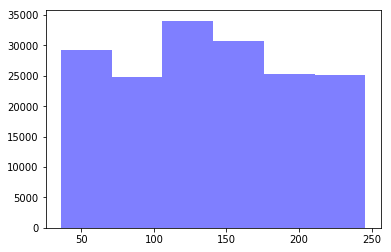

In [225]:
#Bin the MRC amount
num_bins = 6
n, bins, patches = plt.hist(df_x['total_mrc_amt'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [226]:
df_x['total_mrc_amt_bin'] = df_x['total_mrc_amt']
df_x.loc[ df_x['total_mrc_amt_bin'] <= 50, 'total_mrc_amt_bin'] = 0
df_x.loc[(df_x['total_mrc_amt_bin'] > 50) & (df_x['total_mrc_amt_bin'] <= 100), 'total_mrc_amt_bin'] = 1
df_x.loc[(df_x['total_mrc_amt_bin'] > 100) & (df_x['total_mrc_amt_bin'] <= 150), 'total_mrc_amt_bin'] = 2
df_x.loc[(df_x['total_mrc_amt_bin'] > 150) & (df_x['total_mrc_amt_bin'] <= 200), 'total_mrc_amt_bin'] = 3
df_x.loc[(df_x['total_mrc_amt_bin'] > 200) & (df_x['total_mrc_amt_bin'] <= 250), 'total_mrc_amt_bin'] = 4
df_x.loc[ df_x['total_mrc_amt_bin'] > 250, 'total_mrc_amt_bin'] = 5
df_x['total_mrc_amt_bin'] = df_x['total_mrc_amt_bin'].astype(int)

In [227]:
# let's see how it's distributed
df_x['total_mrc_amt_bin'].value_counts()

2    45367
3    41333
1    34974
4    32427
0    15103
Name: total_mrc_amt_bin, dtype: int64

In [228]:
# Drop numeric MRC column
df_x = df_x.drop(['total_mrc_amt'], 1)

# **Building the model**

In [229]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_x, df_y, test_size = .2, random_state=1)
X_train = dfX_train.values
X_test = dfX_test.values
y_train = dfy_train.values 
y_test = dfy_test.values

In [238]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=200, random_state=1, 
                                       max_depth=10, 
                                       min_samples_leaf = 4,
                                       min_samples_split = 10,
                                       n_jobs=-1)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)
Y_prediction_train = random_forest.predict(X_train)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


68.43 %


In [239]:
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest_test,2,), "%")

65.08 %


In [49]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, y_train)

Y_pred_log = logreg.predict(X_test)
Y_pred_log_train = logreg.predict(X_train)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


62.47 %


C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

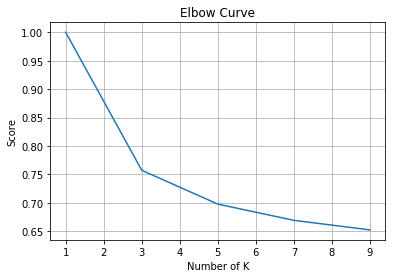

In [97]:
import pylab as pl
myList = list(range(1,10))
Nc = list(filter(lambda x: x % 2 != 0, myList))
knn_opt = [KNeighborsClassifier(n_neighbors=i, n_jobs=-1) for i in Nc]

score = [knn_opt[i].fit(X_train, y_train).score(X_train, y_train) for i in range(len(knn_opt))]

pl.plot(Nc,score)
pl.grid(True)
pl.xlabel('Number of K')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [92]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
knn.fit(X_train, y_train)

Y_pred_knn = knn.predict(X_test)
Y_pred_knn_train = knn.predict(X_train)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


75.72 %


In [51]:
# Perceptron
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, y_train)

Y_pred_perc = perceptron.predict(X_test)
Y_pred_perc_train = perceptron.predict(X_train)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


51.2 %


In [140]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train, y_train)

Y_pred_dt = decision_tree.predict(X_test)
Y_pred_dt_train = decision_tree.predict(X_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

65.66 %


In [240]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_perceptron, 
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
75.72,KNN
68.43,Random Forest
65.66,Decision Tree
62.47,Logistic Regression
51.20,Perceptron


# **K-Fold Cross Validation**

K-Fold Cross Validation randomly splits the training data into **K subsets called folds**. Let's image we would split our data into 4 folds (K = 4).  Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds. 

In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

In [241]:
c, r = y_train.shape
y_train_reshape = y_train.reshape(c,)

In [242]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train_reshape, cv=10, scoring = "accuracy", n_jobs=-1)

In [243]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.64667208 0.64822339 0.64999631 0.64238753 0.65085697 0.63874113
 0.64671986 0.64745863 0.64287825 0.65445142]
Mean: 0.6468385577136059
Standard Deviation: 0.004329927629424358


Our model has a average accuracy of 65% with a standard deviation of 0.03%; the accuracy of our model can differ +/- 0.03%

In [244]:
scoresKNN = cross_val_score(knn, X_train, y_train_reshape, cv=10, scoring = "accuracy", n_jobs=-1)
print("Scores:", scoresKNN)
print("Mean:", scoresKNN.mean())
print("Standard Deviation:", scoresKNN.std())

Scores: [0.51931743 0.51414641 0.52301101 0.51717515 0.52423168 0.51085993
 0.5212766  0.52556147 0.51307624 0.51518286]
Mean: 0.518383876572569
Standard Deviation: 0.004804254915964992


## RF Feature Importance

In [245]:
 #Importance of Features
Importance = list(zip(dfX_train, random_forest.feature_importances_))
I = pd.DataFrame(Importance)
I = I.rename(columns = {0: "Features", 1: "Score"})
I = I.sort_values('Score', ascending=False)
#Printing the Important variables
I.head(75)

,Features,Score
96,visited_digital_last_30_days,0.149405
82,email_clk_fmt_h_l90d,0.054207
72,call_sales_count_90d,0.054060
19,svcs_days_since_most_recent_x1,0.042117
74,call_total_count_90d,0.040896
97,num_prod_site_visited,0.034354
84,wifi_total_gb,0.032924
12,svcs_hsd_days_on_books,0.030959
16,svcs_days_since_most_recent_hsd,0.028408
68,email_opn_anycom_l90d,0.019244


In [246]:
#TopFeatures = list(I[(I['Score']>0.01)].Features)
TopFeatures = ['visited_digital_last_30_days','number_of_products','total_mrc_amt_bin',
                  'demo_children_num_hh','num_prod_site_visited','svcs_hsd_tier_name',
                  'email_clk_fmt_h_l90d','call_sales_count_90d','wifi_total_gb','email_opn_anycom_l90d']

In [247]:
# Train again with top features
# Random Forest w top features
dfX_train_top = dfX_train[TopFeatures]
dfX_test_top = dfX_test[TopFeatures]
X_train_top = dfX_train_top.values 
X_test_top = dfX_test_top.values

random_forest_top = RandomForestClassifier(n_estimators=200, random_state=1, 
                                       max_depth=10, 
                                       min_samples_leaf = 4,
                                       min_samples_split = 10,
                                       n_jobs=-1)
random_forest_top.fit(X_train_top, y_train)
Y_prediction_top = random_forest_top.predict(X_test_top)
Y_prediction_top_train = random_forest_top.predict(X_train_top)
random_forest_top.score(X_train_top, y_train)

acc_random_forest_top = round(random_forest_top.score(X_train_top, y_train) * 100, 2)
print(round(acc_random_forest_top,2,), "%")

acc_random_forest_top_test = round(random_forest_top.score(X_test_top, y_test) * 100, 2)
print(round(acc_random_forest_top_test,2,), "%")

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


62.94 %
62.12 %


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100]}

from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

In [ ]:
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

In [ ]:
clf.fit(X_train_top, y_train_reshape)

In [ ]:
clf.best_params_

In [123]:
#Test with different parameters to improve accuracy
# Random Forest
random_forest_param = RandomForestClassifier(n_estimators=150, random_state=1, max_depth=10, min_samples_leaf=5, bootstrap=True,
                                            n_jobs=-1)
                                        #, min_samples_split=10, min_samples_leaf=1

random_forest_param.fit(X_train, y_train)
Y_prediction_param = random_forest_param.predict(X_test)

random_forest_param.score(X_train, y_train)

print("oob score:", round(random_forest_param.oob_score_, 4)*100, "%")

C:\Users\dkim207\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


oob score: 63.85999999999999 %


In [102]:
Y_prediction_param_train = random_forest_param.predict(X_train)

In [124]:
acc_random_forest_param = round(random_forest_param.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest_param,2,), "%")

99.59 %


In [248]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train_reshape, cv=3, n_jobs=-1)
confusion_matrix(y_train_reshape, predictions)

array([[47365, 20404],
       [27471, 40123]], dtype=int64)

In [257]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions_top = cross_val_predict(random_forest_top, X_train_top, y_train_reshape, cv=3, n_jobs=-1)
confusion_matrix(y_train_reshape, predictions_top)

array([[48804, 18965],
       [32049, 35545]], dtype=int64)

In [272]:
#Confusion Matrix Training
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, Y_prediction_train)
pd.DataFrame(confusion_matrix_train)

,0,1
0,50532,17237
1,25493,42101


In [273]:
#Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, Y_prediction)
pd.DataFrame(confusion_matrix_test)

,0,1
0,11872,4961
1,6857,10151


The first row is about the no-XM-predictions: **49.5K customers were correctly classified as no XM** (called true negatives)  and **18.2K where wrongly classified as no XM** (false negatives).

The second row is about the XM-predictions: **24K customers where wrongly classified as XM** (false positives) and **43.5K where correctly classified as XM** (true positives).

In [253]:
#Check Precision and Recall
from sklearn.metrics import precision_score, recall_score
rec=recall_score(y_train,Y_prediction_train)
pres=precision_score(y_train,Y_prediction_train)
print ('Recall:', rec)
print ('Precision:', pres)

Recall: 0.6228511406337841
Precision: 0.7095116114462907


In [254]:
#Testing
rec=recall_score(y_test,Y_prediction)
pres=precision_score(y_test,Y_prediction)
print ('Recall:', rec)
print ('Precision:', pres)

Recall: 0.5968367826904986
Precision: 0.6717178401270514


In [255]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6628942455433112
Recall: 0.5935881883007368


Our model predicts 65.4% of the time, a customer's XM attach correctly (precision). The recall tells us that it predicted the XM attach of 62.2% of the people who actually attached. 

In [256]:
#F Score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.6263297976131939

F Score is a combination of Precision and Recall

In [258]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

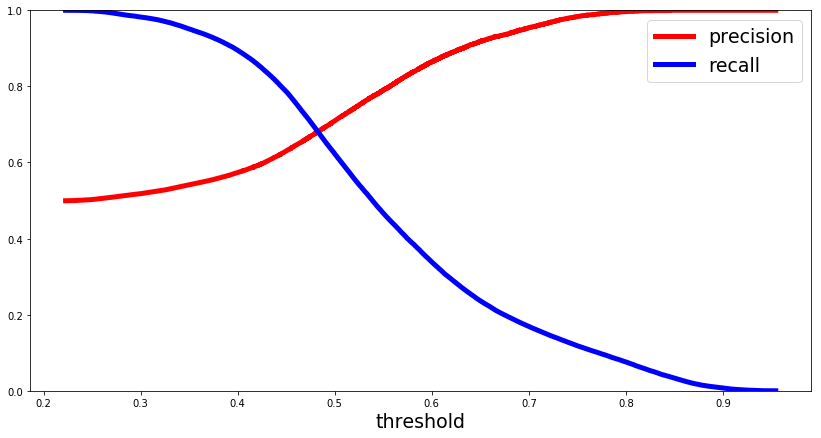

In [259]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 65%.  Because of that you may want to select the precision/recall tradeoff before that - maybe at around 60 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4.  Then you could train a model with exactly that threshold and would get the desired accuracy.


Another way is to plot the precision and recall against each other:

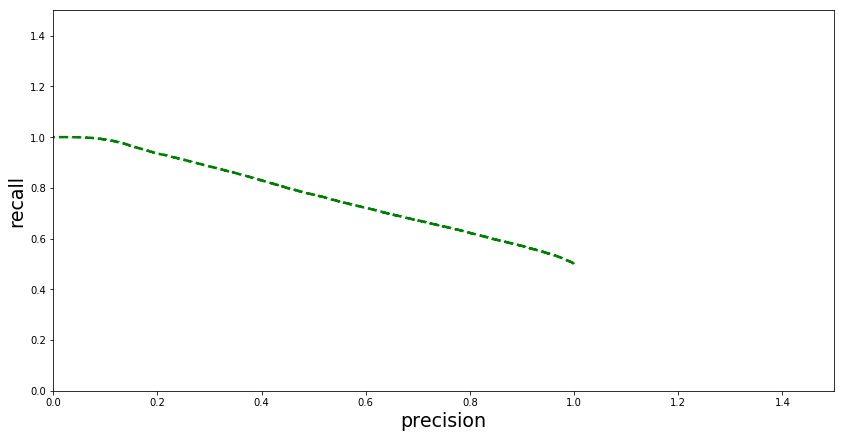

In [260]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [261]:
#ROC AUC Curve
from sklearn.metrics import roc_curve, auc
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

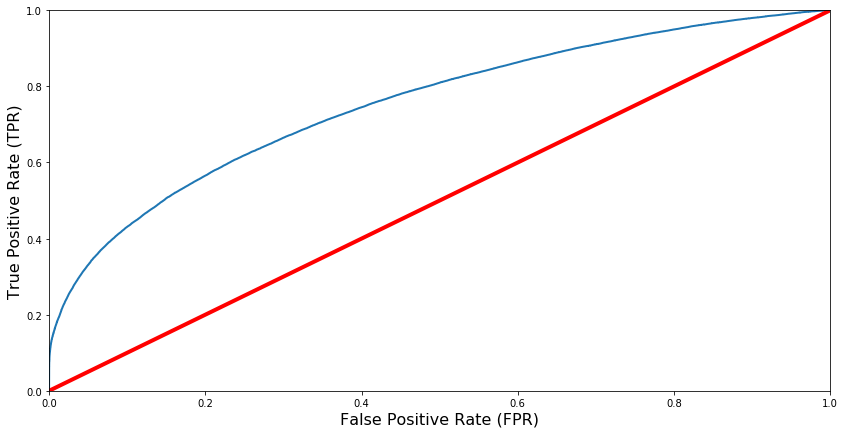

In [262]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [263]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7530823574422565


In [264]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_test_scores = random_forest.predict_proba(X_test)
y_test_scores = y_test_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_test_scores)

In [265]:
#ROC AUC Curve
from sklearn.metrics import roc_curve, auc
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_scores)

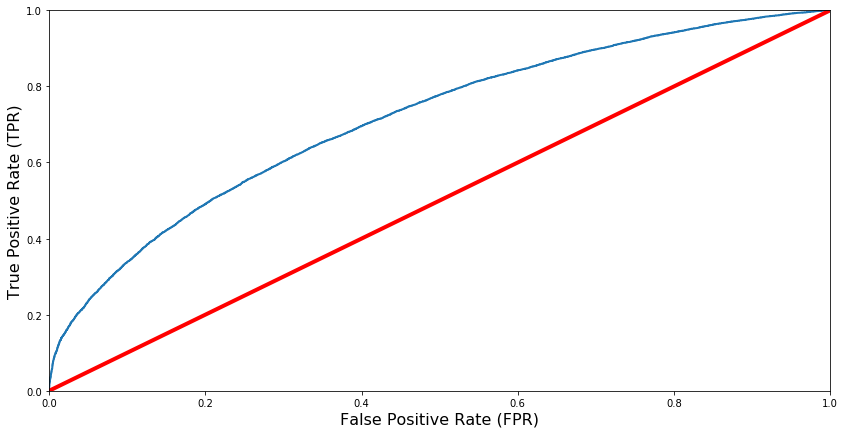

In [266]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [267]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_test_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7133342787894965


In [268]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

the AUC is : 0.7531


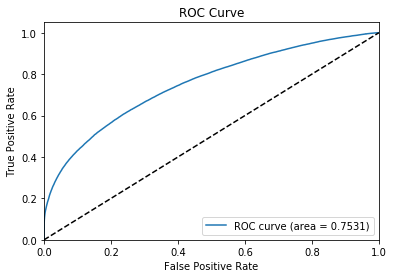

In [269]:
Performance(Model=random_forest,Y=y_train,X=X_train)

the AUC is : 0.7133


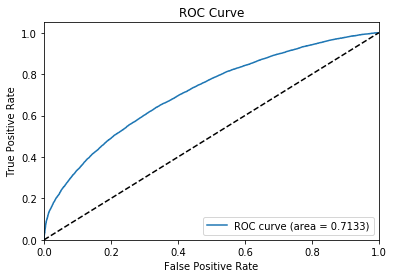

In [270]:
Performance(Model=random_forest,Y=y_test,X=X_test)